In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import zipfile
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
zip_path = '/content/drive/MyDrive/Colab Notebooks/Brain Tumor/Brain Tumor Types.zip'

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Brain Tumor/Brain Tumor Types.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/brain_tumor_dataset')

In [4]:
data_dir = '/content/brain_tumor_dataset'

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 3686 files belonging to 4 classes.
Using 2949 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 3686 files belonging to 4 classes.
Using 737 files for validation.


In [8]:
class_names = train_ds.class_names
print(f"Classes: {class_names}")

Classes: ['glioma', 'meningioma', 'normal', 'pituitary_tumor']


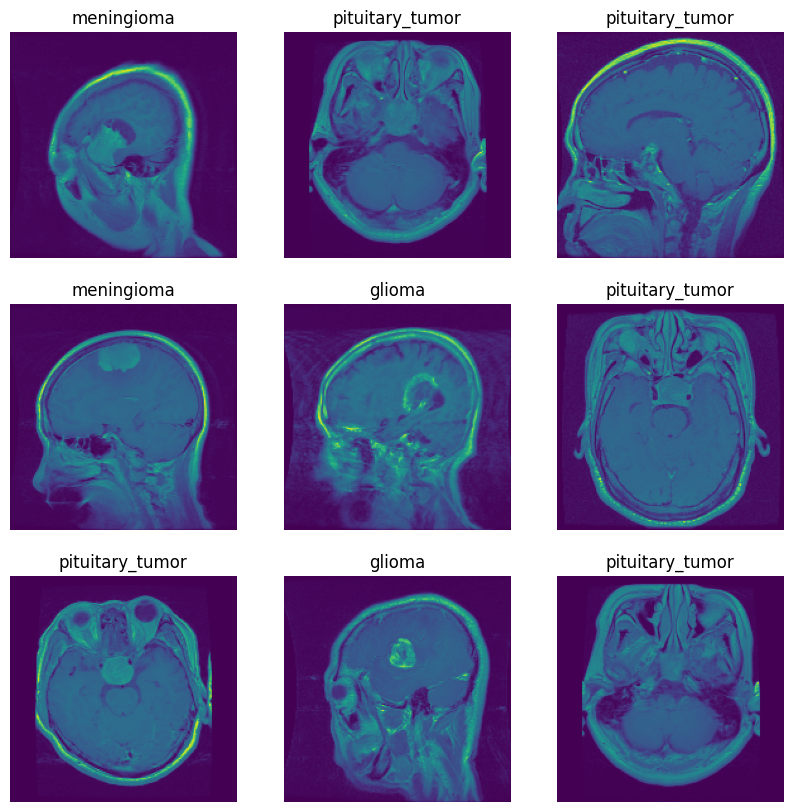

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [12]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - accuracy: 0.5322 - loss: 1.1013 - val_accuracy: 0.7341 - val_loss: 0.6110
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.7491 - loss: 0.6050 - val_accuracy: 0.7748 - val_loss: 0.5112
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8129 - loss: 0.4589 - val_accuracy: 0.7748 - val_loss: 0.4865
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8512 - loss: 0.3553 - val_accuracy: 0.8670 - val_loss: 0.3655
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8859 - loss: 0.2902 - val_accuracy: 0.8847 - val_loss: 0.3012
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9362 - loss: 0.1827 - val_accuracy: 0.8792 - val_loss: 0.3590
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9490 - loss: 0.1409 - val_accuracy: 0.9145 - val_loss: 0.2947
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9621 - loss: 0.1028 - val_accuracy: 0.9091 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


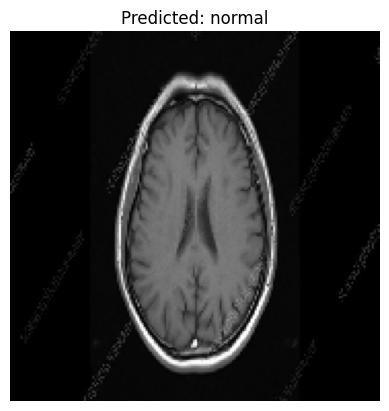

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img1_path = '/content/f0365762-800px-wm.jpg'
img2 = load_img(img1_path, target_size=(img_height, img_width), color_mode='grayscale')
img2_arr = img_to_array(img2)
img2_arr = tf.expand_dims(img2_arr, axis=0)
img2_arr = img2_arr / 255.0
pred2 = model.predict(img2_arr)
predicted_class_index = tf.argmax(pred2[0])
predicted1_class = class_names[predicted_class_index]

plt.imshow(img2, cmap='gray')
plt.title(f"Predicted: {predicted1_class}")
plt.axis('off')
plt.show()

In [21]:
model.save('brain_tumor_recognizer_model.keras')